In [4]:
# API를 이용하는 함수 구성
import urllib.request
import datetime
def get_request_url(API_url):           # API_url을 인자로 하는 get_request_url함수 선언 . 
    client_id = "kUMekrHWTsTF09Meg3Sj"  # API 등록 ID
    client_secret = "DYchAGoQGY"        #API 이용 pw
    
    request = urllib.request.Request(API_url) # API_url을 받아 페이지 정보 요청
    request.add_header("X-Naver-Client-Id",client_id) # header에 등록 정보 포함하여 요청
    request.add_header("X-Naver-Client-Secret",client_secret)

    response = urllib.request.urlopen(request) # 요청의 결과를 response 함수에 저장
    if response.getcode()==200: # 결과가 200(참)이면 아래 내용 출력
        print("[%s] Url Request Success" %datetime.datetime.now()) #현재 날짜 정보 [ ] 안에 입력
        return response.read().decode('utf-8')                     #불러온 내용을 utf-8로 decode한 결과 반출
    else:
        print("[%s] Error --------------" %datetime.datetime.now())
        return None

In [5]:
import json
def get_search_result(api_node, search_text, start_num, disp_num):
    #api_node, search_text, start_num, disp_num을 인자로 하는 get_search_result함수 선언
    #url을 부분별로 나눠 인자를 포함하는 변수 만들기
    base = "https://openapi.naver.com/v1/search" 
    node = "/" + api_node + ".json"              #api_node는 shop, book, movie등 검색영역 
    param_query = "?query=" + urllib.parse.quote(search_text) #search_text는 입력을 받아 url에 맞는 코드로 변경
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    url = base + node + param_query + param_start + param_disp
    
    # 요청이 올바르게 왔는지 확인하는 과정
    getting_data = get_request_url(url) 
    #get_request_url 함수가 url 변수를 인자로 받아 결과 변수에 저장
    if (getting_data == None): # 결과가 없다면 none 반환
        return None
    else:
        return json.loads(getting_data) 
    # 결과가 있다면 json형태로 반환
    #json파일은 dictionary형과 list형의 조합으로 구성
    # key값과 리스트의 index 값을 통해 value탐색

In [6]:
#함수 동작
search_result = get_search_result('shop', '몰스킨', 1, 2)

# naver쇼핑에서 몰스킨을 검색어로 하고 첫번째 정보부터 2개만 불러오기

[2018-08-25 14:18:28.607947] Url Request Success


In [7]:
search_result

{'display': 2,
 'items': [{'hprice': '41130',
   'image': 'https://shopping-phinf.pstatic.net/main_7398991/7398991731.20180112135400.jpg',
   'link': 'http://search.shopping.naver.com/gate.nhn?id=7398991731',
   'lprice': '15690',
   'mallName': '네이버',
   'productId': '7398991731',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식 룰드 줄지'},
  {'hprice': '0',
   'image': 'https://shopping-phinf.pstatic.net/main_1337253/13372539964.1.jpg',
   'link': 'http://search.shopping.naver.com/gate.nhn?id=13372539964',
   'lprice': '19400',
   'mallName': 'N펀키보이',
   'productId': '13372539964',
   'productType': '2',
   'title': 'KM <b>몰스킨</b> 클래식 룰드 줄지 소프트커버 라지 노트북 9788'}],
 'lastBuildDate': 'Sat, 25 Aug 2018 14:18:28 +0900',
 'start': 1,
 'total': 22531}

In [8]:
search_result["items"]
# json 포맷에서 'items' key의 value값인 list 출력

[{'hprice': '41130',
  'image': 'https://shopping-phinf.pstatic.net/main_7398991/7398991731.20180112135400.jpg',
  'link': 'http://search.shopping.naver.com/gate.nhn?id=7398991731',
  'lprice': '15690',
  'mallName': '네이버',
  'productId': '7398991731',
  'productType': '1',
  'title': '<b>몰스킨</b> 클래식 룰드 줄지'},
 {'hprice': '0',
  'image': 'https://shopping-phinf.pstatic.net/main_1337253/13372539964.1.jpg',
  'link': 'http://search.shopping.naver.com/gate.nhn?id=13372539964',
  'lprice': '19400',
  'mallName': 'N펀키보이',
  'productId': '13372539964',
  'productType': '2',
  'title': 'KM <b>몰스킨</b> 클래식 룰드 줄지 소프트커버 라지 노트북 9788'}]

In [9]:
search_result['start'], search_result['total'], search_result['display']
# search_result에서 start, total, display key의 value 출력

(1, 22531, 2)

In [10]:
search_result['items'][0]['title']
# items key의 첫번째 value값 내에서 title key의 value값 출력

'<b>몰스킨</b> 클래식 룰드 줄지'

In [12]:
search_result['items'][0]['lprice'], search_result['items'][0]['hprice']
#items key의 첫번째 value값에서 hprice, lprice key의 value출력

('15690', '41130')

In [13]:
search_result['items'][0]['title'].replace('<b>','')
#결과에서 <b>를 공백없음으로 치환

'몰스킨</b> 클래식 룰드 줄지'

In [14]:
def delete_tag(input_str): # 함수선언
    input_str = input_str.replace('<b>','') # <b>를 공백없음으로 대체
    input_str = input_str.replace('</b>','') # </b>를 공백없음으로 대체
    return input_str #치환한 결과 반환

In [15]:
import pandas as pd
def get_fields(post): #함수 선언
    #빈 list 만들기
    title = [] 
    link = []
    lprice = []
    hprice = []
    
    # post인자를 받는 반복문 작성
    for each in post:
        title.append(delete_tag(each['title'])) # 'title'key의 value값을 가져와 delet_tag 함수 수행한 결과 저장
        link.append(each['link'])               # 'link' key의 value값 저장
        lprice.append(each['lprice'])           # 'lprive' key의 value값 저장
        hprice.append(each['hprice'])           #  'hprice'key의 value값 저장
    
    # 반복문의 결과로 dataframe을 만들고 columns 이름을 title, lprice, hprice로 한다.
    result_pd = pd.DataFrame({'title':title,'lprice':lprice, 'hprice':hprice, 'link':link}, columns = ['title', 'lprice', 'hprice','link'])
    
    return result_pd #결과 반출

In [16]:
get_fields(search_result['items'])
# search_result의 'items'key 결과를 get_fields 인자로 갖는 함수호출

,title,lprice,hprice,link
0,몰스킨 클래식 룰드 줄지,15690,41130,http://search.shopping.naver.com/gate.nhn?id=7...
1,KM 몰스킨 클래식 룰드 줄지 소프트커버 라지 노트북 9788,19400,0,http://search.shopping.naver.com/gate.nhn?id=1...


In [17]:
#위의 함수에 인자 재입력 결과
search_result = get_search_result('shop','몰스킨','1','2')
tmp1 = get_fields(search_result['items'])
tmp1

[2018-08-25 14:29:37.287297] Url Request Success


,title,lprice,hprice,link
0,몰스킨 클래식 룰드 줄지,15690,41130,http://search.shopping.naver.com/gate.nhn?id=7...
1,KM 몰스킨 클래식 룰드 줄지 소프트커버 라지 노트북 9788,19400,0,http://search.shopping.naver.com/gate.nhn?id=1...


In [18]:
# 위와 다른 인자값을 입력한 함수 호출
search_result = get_search_result('shop','몰스킨','3','2')
tmp2 = get_fields(search_result['items'])
tmp2

[2018-08-25 14:30:05.682184] Url Request Success


,title,lprice,hprice,link
0,몰스킨 까이에 엑스라지 다이어리,8700,34100,http://search.shopping.naver.com/gate.nhn?id=1...
1,몰스킨 2017 위클리 18개월 그린 하드 다이어리,20000,228500,http://search.shopping.naver.com/gate.nhn?id=1...


In [19]:
tmp1.append(tmp2)
#tmp2결과를 tmp1에 추가

,title,lprice,hprice,link
0,몰스킨 클래식 룰드 줄지,15690,41130,http://search.shopping.naver.com/gate.nhn?id=7...
1,KM 몰스킨 클래식 룰드 줄지 소프트커버 라지 노트북 9788,19400,0,http://search.shopping.naver.com/gate.nhn?id=1...
0,몰스킨 까이에 엑스라지 다이어리,8700,34100,http://search.shopping.naver.com/gate.nhn?id=1...
1,몰스킨 2017 위클리 18개월 그린 하드 다이어리,20000,228500,http://search.shopping.naver.com/gate.nhn?id=1...


In [22]:
# 네이버 쇼핑에서 몰스킨에 대한 100개의 검색결과 출력
result_mol = []
for n in range(1,100,10):
    # 1~100까지 10간격으로 변수 입력 (1, 11, 21, 31, 41) , 10개씩 결과 잘라 입력 
    search_result = get_search_result('shop','몰스킨', n,'10')
    # 네이버 쇼핑에서 몰스킨을 검색하고 n부터 10개 검색결과 변수저장 
    result_mol.append(get_fields(search_result['items']))
    # 각 결과에서 item key를 인자로 갖는 함수 호출하여 빈 list에 저장
result_mol = pd.concat(result_mol)
    # concat10개씩 분할된 결과를 붙이기

[2018-08-25 14:32:45.704082] Url Request Success
[2018-08-25 14:32:45.860662] Url Request Success
[2018-08-25 14:32:46.029212] Url Request Success
[2018-08-25 14:32:46.266579] Url Request Success
[2018-08-25 14:32:46.474023] Url Request Success
[2018-08-25 14:32:46.664618] Url Request Success
[2018-08-25 14:32:46.854025] Url Request Success
[2018-08-25 14:32:47.062347] Url Request Success
[2018-08-25 14:32:47.278629] Url Request Success
[2018-08-25 14:32:47.501306] Url Request Success


In [23]:
result_mol.head()

,title,lprice,hprice,link
0,몰스킨 클래식 룰드 줄지,15690,41130,http://search.shopping.naver.com/gate.nhn?id=7...
1,KM 몰스킨 클래식 룰드 줄지 소프트커버 라지 노트북 9788,19400,0,http://search.shopping.naver.com/gate.nhn?id=1...
2,몰스킨 까이에 엑스라지 다이어리,8700,34100,http://search.shopping.naver.com/gate.nhn?id=1...
3,몰스킨 2017 위클리 18개월 그린 하드 다이어리,20000,228500,http://search.shopping.naver.com/gate.nhn?id=1...
4,몰스킨 2018 스누피 다이어리,12000,0,http://search.shopping.naver.com/gate.nhn?id=1...


In [24]:
result_mol = result_mol.reset_index(drop=True) 
# 0-9가 반복되는 index를 0-99까지 index 재설정
result_mol

,title,lprice,hprice,link
0,몰스킨 클래식 룰드 줄지,15690,41130,http://search.shopping.naver.com/gate.nhn?id=7...
1,KM 몰스킨 클래식 룰드 줄지 소프트커버 라지 노트북 9788,19400,0,http://search.shopping.naver.com/gate.nhn?id=1...
2,몰스킨 까이에 엑스라지 다이어리,8700,34100,http://search.shopping.naver.com/gate.nhn?id=1...
3,몰스킨 2017 위클리 18개월 그린 하드 다이어리,20000,228500,http://search.shopping.naver.com/gate.nhn?id=1...
4,몰스킨 2018 스누피 다이어리,12000,0,http://search.shopping.naver.com/gate.nhn?id=1...
5,[한정판]몰스킨 슈퍼마리오 하드룰드L 풀스크린 블루,33520,0,http://search.shopping.naver.com/gate.nhn?id=1...
6,몰스킨 클래식 룰드 줄지 소프트커버 라지 9788-88370-7162,19000,0,http://search.shopping.naver.com/gate.nhn?id=1...
7,몰스킨 피너츠 데일리 2018 코랄오렌지 라지 55532,8990,0,http://search.shopping.naver.com/gate.nhn?id=1...
8,[한정판] 몰스킨 노트 아톰 하드커버 룰드 라지 다크그레이,34990,0,http://search.shopping.naver.com/gate.nhn?id=1...
9,몰스킨 피너츠 데일리 2018 코랄오렌지 라지 55532,9900,0,http://search.shopping.naver.com/gate.nhn?id=8...


In [26]:
#가격 결과 float형으로 변환
result_mol['lprice'] = result_mol['lprice'].astype('float')
result_mol['hprice'] = result_mol['hprice'].astype('float')
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
title     100 non-null object
lprice    100 non-null float64
hprice    100 non-null float64
link      100 non-null object
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [35]:
# writer에 대한 정보는 강의자료 페이지에 사이트 참고
# 위의 100개 결과를 excelwriter 함수를 이용하여 엑셀 형식으로 저장
writer = pd.ExcelWriter("../source_code/05_molskin_diary_in_naver_shop.xlsx", engine = 'xlsxwriter')
# 저장위치, 파일 명, 파일 형식 지정
result_mol.to_excel(writer, sheet_name = 'Sheet1')
# 위의 결과를 writer에 따라 excel로 저장하고 sheet 이름을 Sheet1로 함.

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 4) # A열 전체 넒이 4
worksheet.set_column('B:B', 60) # B열의 넓이 60
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 10)
worksheet.set_column('E:E', 50)

worksheet.conditional_format('C2:C101', {'type' : '3_color_scale'})
# C열은 녹,주,황색으로 수치의 크기 표현
writer.save()

In [7]:
#클로바 얼굴 인식, 닮은 연예인
import requests
client_id = "kUMekrHWTsTF09Meg3Sj"
client_secret = "DYchAGoQGY"
url = 'https://openapi.naver.com/v1/vision/celebrity'
files = {'image':open('../source_code/jiseung1.jpg','rb')}
headers = {'X-Naver-Client-Id':client_id, "X-Naver-Client-Secret" : client_secret }

response = requests.post(url, files=files, headers=headers)
# url주소에 file로 저장한 이미지와 인증 정보를 담아 API호출
rescode = response.status_code # 올바른 요청 결과 코드 rescode로 저장
if(rescode==200): # 200(올바른 요청 결과)
    print(response.text) # 요청 결과 출력
else:
    print('Error code'+ rescode) # 올바르지 않은 결과 error코드 출력


{"info":{"size":{"width":653,"height":890},"faceCount":1},"faces":[{"celebrity":{"value":"방중현","confidence":0.209463}}]}


In [5]:
# 클로바 얼굴인식, 연령, 성별, 기분 정보 추정
url = 'https://openapi.naver.com/v1/vision/face'
files = {'image':open('../source_code/jiseung1.jpg','rb')}
headers = {'X-Naver-Client-Id':client_id, "X-Naver-Client-Secret" : client_secret }
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print(response.text)
else:
    print('Error code'+ rescode)

{"info":{"size":{"width":653,"height":890},"faceCount":1},"faces":[{"roi":{"x":257,"y":137,"width":353,"height":353},"landmark":{"leftEye":{"x":369,"y":211},"rightEye":{"x":513,"y":210},"nose":{"x":439,"y":309},"leftMouth":{"x":328,"y":354},"rightMouth":{"x":484,"y":385}},"gender":{"value":"male","confidence":0.677208},"age":{"value":"24~28","confidence":0.255111},"emotion":{"value":"smile","confidence":0.907053},"pose":{"value":"frontal_face","confidence":0.998425}}]}


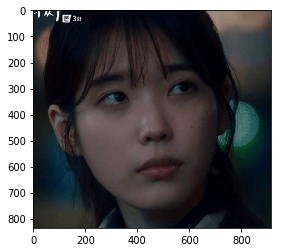

In [46]:
# 사진에 박스 넣기
# 사진에 축정보 입력 위해 plt모듈 호출
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

img = mpimg.imread('../source_code/face_detection_test_IU.jpg')
imgplot = plt.imshow(img)

In [64]:
import json
# 사진에 대한 얼굴인식 정보 json형태로 변수 저장
detection_result = json.loads(response.text)
detection_result

{'faces': [{'age': {'confidence': 0.374036, 'value': '12~16'},
   'emotion': {'confidence': 0.99803, 'value': 'neutral'},
   'gender': {'confidence': 0.993843, 'value': 'female'},
   'landmark': {'leftEye': {'x': 320, 'y': 325},
    'leftMouth': {'x': 393, 'y': 620},
    'nose': {'x': 460, 'y': 454},
    'rightEye': {'x': 575, 'y': 287},
    'rightMouth': {'x': 572, 'y': 594}},
   'pose': {'confidence': 0.999622, 'value': 'frontal_face'},
   'roi': {'height': 517, 'width': 517, 'x': 196, 'y': 193}}],
 'info': {'faceCount': 1, 'size': {'height': 836, 'width': 914}}}

In [48]:
#'face' key값 내 key 정보 출력
detection_summary = detection_result['faces'][0]
detection_summary.keys()

dict_keys(['gender', 'landmark', 'age', 'roi', 'pose', 'emotion'])

In [65]:
detection_summary['roi']
# 'roi' key는 얼굴 위치 좌표
# dict형은 순서가 없으므로 [roi][height] value하나씩 저장 필요함.

{'height': 517, 'width': 517, 'x': 196, 'y': 193}

In [66]:
# 얼굴위치 좌표 저장
h,w,x,y = detection_summary['roi'].values()
h,w,x,y

(193, 517, 517, 196)

In [55]:
gender, gen_confidence = detection_summary['gender'].values()
gender, gen_confidence

('female', 0.993843)

In [59]:
# 얼굴좌표, 성별 정보, 감성정보, 나이 정보 저장
w,h,x,y = detection_summary['roi'].values()
gender, gen_confidence = detection_summary['gender'].values()
emotion, emotion_confidence = detection_summary['emotion'].values()
age, age_confidence = detection_summary['age'].values()

In [60]:
detection_summary['roi'].values()

dict_values([193, 517, 517, 196])

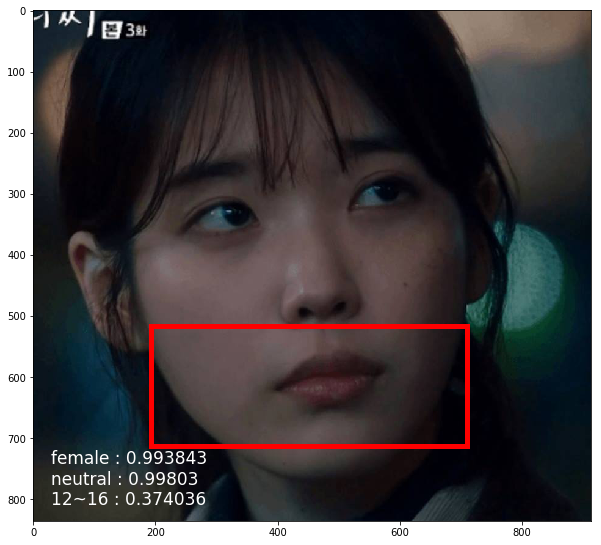

In [57]:
# 사진에 박스 그리기
fig, ax = plt.subplots(figsize=(10,10)) 
# 축 정보를 갖는 subplot 그리기
ax.imshow(img) 
# 이미지 보기
# 얼굴 인식 좌표 정보 위치에 박스 그리기
rect_face = patches.Rectangle((x,y),w,h,
                             linewidth = 5,
                             edgecolor = 'r',
                             facecolor = 'none')
ax.add_patch(rect_face) # 박스 넣기
# 사진에 들어갈 주석
annotation = gender + ' : '+ str(gen_confidence) + \
'\n'+emotion+ ' : ' +str(emotion_confidence)+\
'\n'+age+' : '+str(age_confidence)
plt.figtext(0.15, 0.17, annotation, wrap = True, fontsize=17, color = 'white') # 주석 내용 서식
plt. show()

In [68]:
def plotSinwave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t) + b
    """
    
    endTime, sampleTime = kwargs.get('endTime',1), kwargs.get('sampleTime',0.01)
    amp, freq, bias = kwargs.get('amp',1), kwargs.get('freq',1), kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))
    
    time = np.arange(0, endTime, sampleTime)
    result = amp*np.sin(2*np.pi*freq*time) + bias
    
        
    plt.figure(figsize =(12,6))
    plt.plot(time, result); plt.grid(True)
    plt.xlabel('time'); plt.ylabel('sin')
    plt.title(str(amp)+'*sin(2*pi*'+str(freq)+'*t)+'+str(bias))
    plt.show()

In [73]:
import pandas as pd
import numpy as np

def creat_test_data():
    time = np.linspace(0,1,365*2)
    result = np.sin(2*np.pi*12*time)
    ds = pd.date_range('2017-01-01', periods = 365*2, freq = "D")
    return pd.DataFrame({'ds':ds, 'y':result})

In [74]:
df = creat_test_data()
df

,ds,y
0,2017-01-01,0.000000e+00
1,2017-01-02,1.032426e-01
2,2017-01-03,2.053818e-01
3,2017-01-04,3.053260e-01
4,2017-01-05,4.020070e-01
5,2017-01-06,4.943914e-01
6,2017-01-07,5.814921e-01
7,2017-01-08,6.623779e-01
8,2017-01-09,7.361846e-01
9,2017-01-10,8.021232e-01


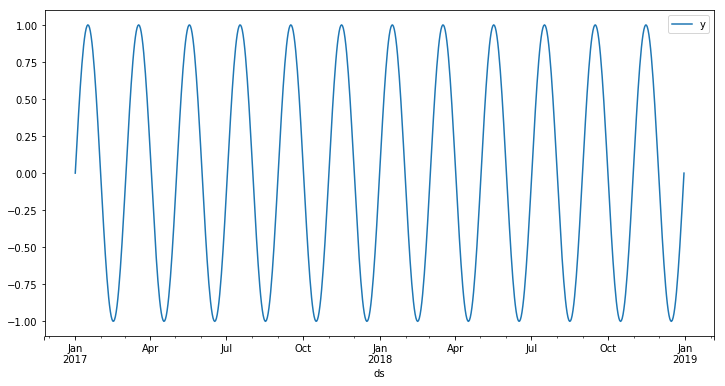

In [76]:
df.plot(x='ds', y = 'y', figsize=(12,6));

In [1]:
from fbprophet import Prophet

ValueError: More than one filename match found for utility code Capsule